## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

movies = pd.read_csv('movies.csv')

In [12]:
movies['metascore'] = pd.to_numeric(movies['metascore'])
movies['month'] = pd.to_numeric(movies['release_date.month'])
movies['votes'] = pd.to_numeric(movies['votes'])
movies['gross'] = pd.to_numeric(movies['gross'])

movies_new = movies[['year', 'movie', 'certificate', 'genre', 'duration', 'rate', 'metascore', 'votes', 'gross', 
                   'release_date', 'user_reviews', 'critic_reviews', 'popularity', 'awards_wins', 'awards_nominations',
                   'Oscar_nominated', 'month']]

new_movies_new = movies_new.loc[movies['certificate'] != 'Not Rated']
new_movies_new = new_movies_new.loc[movies['certificate'] != 'TV-MA']


np.random.seed(2)
train = new_movies_new.sample(round(movies_new.shape[0]*0.6))
test = new_movies_new.drop(train.index)

In [13]:
# Binning awards_nominations
train.awards_nominations.value_counts()
test.awards_nominations.value_counts()

train['award_noms_binned'] = pd.cut(train['awards_nominations'],bins = (-0.001,4,12,30,101),labels = ['Bin1','Bin2','Bin3','Bin4'])
test['award_noms_binned'] = pd.cut(test['awards_nominations'],bins = (-0.001,4,12,30,101),labels = ['Bin1','Bin2','Bin3','Bin4'])



## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

<AxesSubplot:xlabel='votes', ylabel='gross'>

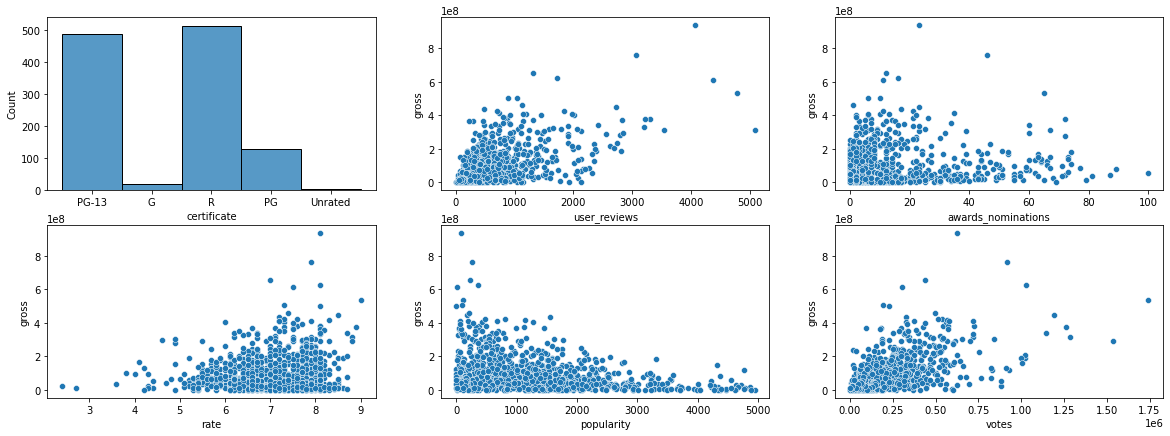

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,7))

sns.histplot(ax = axs[0, 0], data = new_movies_new, x = 'certificate')

sns.scatterplot(ax = axs[1, 0], data = new_movies_new, x = 'rate', y = 'gross')

sns.scatterplot(ax = axs[0, 1], data = new_movies_new, x = 'user_reviews', y = 'gross')

sns.scatterplot(ax = axs[1, 1], data = new_movies_new, x = 'popularity', y = 'gross')

sns.scatterplot(ax = axs[0, 2], data = new_movies_new, x = 'awards_nominations', y = 'gross')

sns.scatterplot(ax = axs[1, 2], data = new_movies_new, x = 'votes', y = 'gross')



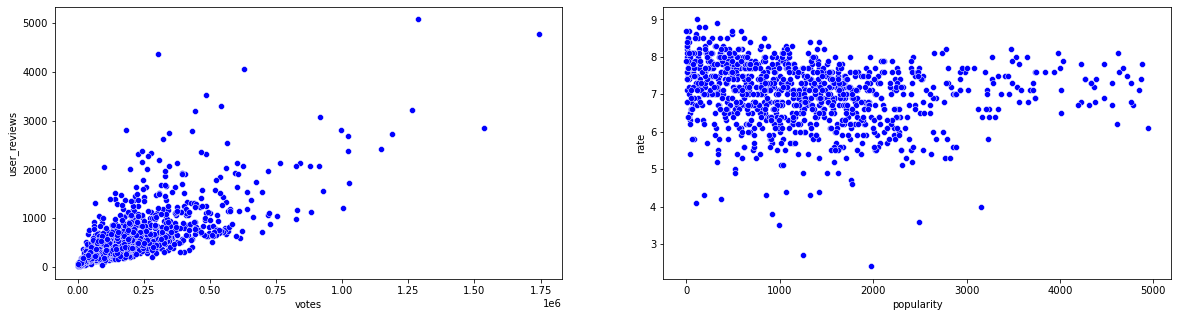

In [22]:
# Examining potential relationships or interactions between predictors that we're considering using
# by Jackson
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.scatterplot(ax = axs[0], x = new_movies_new.votes, y=new_movies_new.user_reviews, color = 'blue')
sns.scatterplot(ax = axs[1], x = new_movies_new.popularity, y=new_movies_new.rate, color = 'blue')

plt.show()

#### Insights from the EDA that were useful for the model:
- User reviews and votes were associated and we ended up using a significant interaction term between these predictors.
- The distribution of popularity seemed logarithmic in nature when graphed against gross. 
- The distribution of rate seemed exponential in nature when graphed against gross. 

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.